Importando bibliotecas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

Importando datasets sobre as olimpíadas de Tokyo 2021.

In [2]:
df_athletes = pd.read_excel("Athletes.xlsx")

In [3]:
df_coaches = pd.read_excel("Coaches.xlsx")

C:\Users\mariz\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
df_gender = pd.read_excel("EntriesGender.xlsx")

In [5]:
df_medals = pd.read_excel("Medals.xlsx")

In [6]:
df_teams = pd.read_excel("Teams.xlsx")

Visualizando datasets.

In [7]:
df_athletes.head(5)

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [8]:
df_coaches.head(5)

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [9]:
df_gender.head(5)

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [10]:
df_medals.head(5)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [11]:
df_teams.head(5)

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


Verificando e tratando valores nulos nos datasets.
Observando os tipos de dados.
Observando as descrições estatísticas.

In [12]:
df_athletes.isnull().sum()

Name          0
NOC           0
Discipline    0
dtype: int64

In [13]:
df_athletes.dtypes

Name          object
NOC           object
Discipline    object
dtype: object

In [14]:
df_athletes.describe()

,Name,NOC,Discipline
count,11085,11085,11085
unique,11062,206,46
top,WANG Yang,United States of America,Athletics
freq,2,615,2068


In [15]:
df_coaches.isnull().sum()

Name            0
NOC             0
Discipline      0
Event         145
dtype: int64

In [16]:
df_coaches.dtypes

Name          object
NOC           object
Discipline    object
Event         object
dtype: object

In [17]:
df_coaches.describe()

,Name,NOC,Discipline,Event
count,394,394,394,249
unique,381,61,9,6
top,MONTICO Loredana,Japan,Basketball,Men
freq,2,35,74,94


In [18]:
df_gender.isnull().sum()

Discipline    0
Female        0
Male          0
Total         0
dtype: int64

In [19]:
df_gender.dtypes

Discipline    object
Female         int64
Male           int64
Total          int64
dtype: object

In [20]:
df_gender.describe()

,Female,Male,Total
count,46.000000,46.000000,46.00000
mean,118.086957,127.913043,246.00000
std,147.169717,166.900746,312.46134
min,10.000000,0.000000,19.00000
25%,42.750000,40.250000,85.50000
50%,90.000000,97.500000,190.00000
75%,138.750000,149.750000,288.75000
max,969.000000,1072.000000,2041.00000


In [21]:
df_medals.isnull().sum()

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

In [22]:
df_medals.dtypes

Rank              int64
Team/NOC         object
Gold              int64
Silver            int64
Bronze            int64
Total             int64
Rank by Total     int64
dtype: object

In [23]:
df_medals.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


In [24]:
df_teams.isnull().sum()

Name          0
Discipline    0
NOC           0
Event         0
dtype: int64

In [25]:
df_teams.dtypes

Name          object
Discipline    object
NOC           object
Event         object
dtype: object

In [26]:
df_teams.describe()

,Name,Discipline,NOC,Event
count,743,743,743,743
unique,146,20,84,36
top,Japan,Swimming,Japan,Men
freq,45,113,48,120


Análise: quantidade de atletas por país.

In [27]:
#contando a quantidade de atletas por país e ordenando na ordem decrescente
df_athletes_count = df_athletes.groupby('NOC').count().sort_values('Name', ascending = False)
#renomeando a coluna e pegando os 20 primeiros resultados
df_athletes_count_20 = df_athletes_count[['Name']].rename(columns = {'Name':'Quantidade de atletas'}).head(20)
df_athletes_count_20

,Quantidade de atletas
NOC,
United States of America,615
Japan,586
Australia,470
People's Republic of China,401
Germany,400
France,377
Canada,368
Great Britain,366
Italy,356


<AxesSubplot:title={'center':'Quantidade de atletas por país (20 países com mais atletas)'}, xlabel='NOC'>

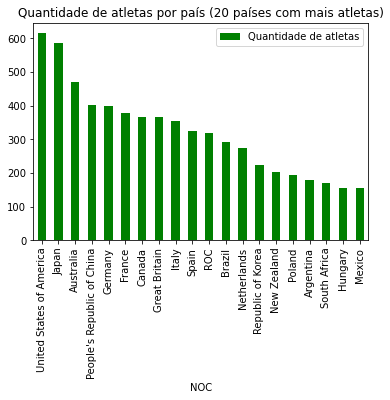

In [28]:
#plotando o gráfico de barras
df_athletes_count_20.plot.bar(title = 'Quantidade de atletas por país (20 países com mais atletas)', color = 'green')

Análise: quantidade de atletas comparativamente com a quantidade de medalhas.

In [29]:
#trocando o indíce da tabela de medalhas para o nome do país
df_medals_index_noc = df_medals.set_index('Team/NOC')
#unindo a tabela de medalhas com a de atletas pelo nome do país, mostrando todos os países inclusive os que não têm medalha
df_athletes_medals = df_medals_index_noc.join(df_athletes_count, how = "right")
#renomeando a coluna de quantidade de atletas e removendo coluna que não será importante
df_athletes_medals = df_athletes_medals.rename(columns = {'Name':'Quantidade de atletas'}).drop('Discipline', axis = 1)
#preenchendo os valores nulos que surgiram pelo join ser do tipo right com 0, pois no caso do país não estar na tabela de medalhas, o número de medalhas é 0
df_athletes_medals = df_athletes_medals.fillna(0)
df_athletes_medals

,Rank,Gold,Silver,Bronze,Total,Rank by Total,Quantidade de atletas
NOC,,,,,,,
United States of America,1.0,39.0,41.0,33.0,113.0,1.0,615
Japan,3.0,27.0,14.0,17.0,58.0,5.0,586
Australia,6.0,17.0,7.0,22.0,46.0,6.0,470
People's Republic of China,2.0,38.0,32.0,18.0,88.0,2.0,401
Germany,9.0,10.0,11.0,16.0,37.0,8.0,400
...,...,...,...,...,...,...,...
South Sudan,0.0,0.0,0.0,0.0,0.0,0.0,2
Central African Republic,0.0,0.0,0.0,0.0,0.0,0.0,2
Saint Kitts and Nevis,0.0,0.0,0.0,0.0,0.0,0.0,2


In [30]:
#verificando que a quantidade de medalhas está como float
df_athletes_medals.dtypes

Rank                     float64
Gold                     float64
Silver                   float64
Bronze                   float64
Total                    float64
Rank by Total            float64
Quantidade de atletas      int64
dtype: object

In [31]:
#trocando os valores float por inteiros, o que faz mais sentido no contexto
df_athletes_medals = df_athletes_medals[['Rank', 'Gold', 'Silver', 'Bronze', 'Total', 'Rank by Total', 'Quantidade de atletas']].astype('int64')
#criando a versão menor da tabela
df_athletes_medals_20 = df_athletes_medals.head(20)
df_athletes_medals_20

,Rank,Gold,Silver,Bronze,Total,Rank by Total,Quantidade de atletas
NOC,,,,,,,
United States of America,1,39,41,33,113,1,615
Japan,3,27,14,17,58,5,586
Australia,6,17,7,22,46,6,470
People's Republic of China,2,38,32,18,88,2,401
Germany,9,10,11,16,37,8,400
France,8,10,12,11,33,10,377
Canada,11,7,6,11,24,11,368
Great Britain,4,22,21,22,65,4,366
Italy,10,10,10,20,40,7,356


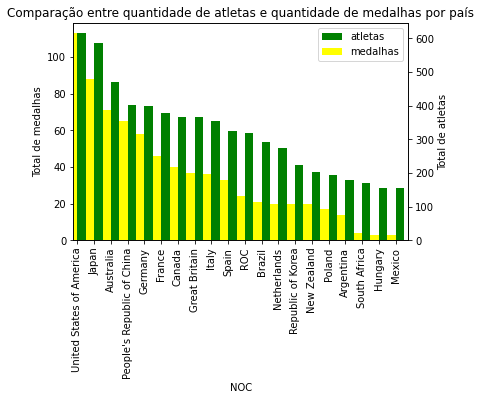

In [32]:
#ordenando por quantidade de medalhas e plotando o gráfico de barras
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
df_athletes_medals_20['Total'].sort_values(ascending = False).plot(kind='bar', color='yellow', position=1, ax = ax)
df_athletes_medals_20['Quantidade de atletas'].plot(kind='bar', color='green', position=0, ax = ax2)
ax.set_ylabel('Total de medalhas')
ax2.set_ylabel('Total de atletas')
plt.title('Comparação entre quantidade de atletas e quantidade de medalhas por país')
p1 = Rectangle((0, 0), 1, 1, fc="green")
p2 = Rectangle((0, 0), 1, 1, fc="yellow")
plt.legend([p1, p2], ['atletas', 'medalhas'])

Análise: quantidade de medalhas.

In [33]:
#ordenando por quantidade de medalhas
df_medals_total = df_medals.sort_values('Rank by Total')
#pegando os 20 primeiros resultados
df_medals_total = df_medals_total.head(20)
df_medals_total

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
4,5,ROC,20,28,23,71,3
3,4,Great Britain,22,21,22,65,4
2,3,Japan,27,14,17,58,5
5,6,Australia,17,7,22,46,6
9,10,Italy,10,10,20,40,7
8,9,Germany,10,11,16,37,8
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10


In [34]:
#ordenando por quantidade de medalhas de ouro
df_medals_gold_20 = df_medals_total.sort_values('Gold', ascending = False)
df_medals_gold_20

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
9,10,Italy,10,10,20,40,7
8,9,Germany,10,11,16,37,8
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10


In [35]:
#ordenando por quantidade de medalhas de prata
df_medals_silver_20 = df_medals_total.sort_values('Silver', ascending = False)
df_medals_silver_20

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
4,5,ROC,20,28,23,71,3
3,4,Great Britain,22,21,22,65,4
2,3,Japan,27,14,17,58,5
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7
21,22,Spain,3,8,6,17,17


In [36]:
#ordenando por quantidade de medalhas de bronze
df_medals_bronze_20 = df_medals_total.sort_values('Bronze', ascending = False)
df_medals_bronze_20

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
4,5,ROC,20,28,23,71,3
3,4,Great Britain,22,21,22,65,4
5,6,Australia,17,7,22,46,6
9,10,Italy,10,10,20,40,7
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
8,9,Germany,10,11,16,37,8
6,7,Netherlands,10,12,14,36,9
43,44,Ukraine,1,6,12,19,16


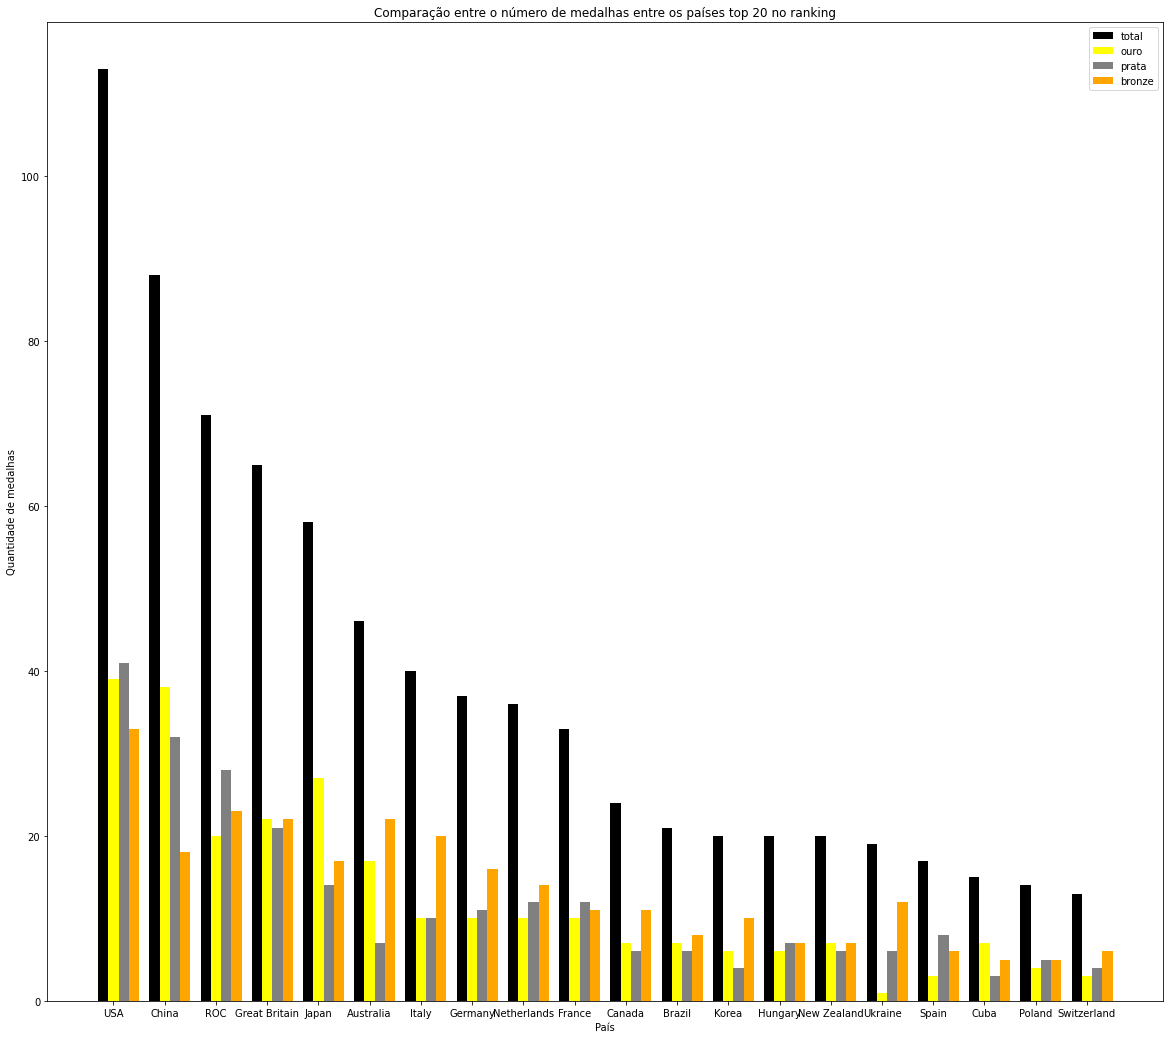

In [37]:
#trocando os nomes que ficariam muito grandes no gráfico
df_medals_total.replace('United States of America', 'USA', inplace = True)
df_medals_total.replace('People\'s Republic of China', 'China', inplace = True)
df_medals_total.replace('Republic of Korea', 'Korea', inplace = True)

#plotando o gráfico de barras referente às medalhas
plt.figure(figsize=(20, 18))

width = 0.2
r1 = np.arange(len(df_medals_total['Total']))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

plt.bar(r1, df_medals_total['Total'], color = 'black', width = width, label = 'total')
plt.bar(r2, df_medals_total['Gold'], color = 'yellow', width = width, label = 'ouro')
plt.bar(r3, df_medals_total['Silver'], color = 'gray', width = width, label = 'prata')
plt.bar(r4, df_medals_total['Bronze'], color = 'orange', width = width, label = 'bronze')

plt.xticks([r + width for r in range(len(df_medals_total['Total']))], df_medals_total['Team/NOC'])
plt.xlabel('País')
plt.ylabel('Quantidade de medalhas')
plt.title('Comparação entre o número de medalhas entre os países top 20 no ranking')

plt.legend()

Análise: quantidade de times por país.

In [38]:
#contando os times de cada país
df_teams.groupby('NOC')['NOC'].count().sort_values(ascending = False).head(10)

NOC
Japan                         48
United States of America      47
Italy                         37
Germany                       36
Australia                     35
ROC                           34
People's Republic of China    33
France                        33
Canada                        30
Great Britain                 28
Name: NOC, dtype: int64

Análise: quantidade de atletas por modalidade.

In [39]:
#contando os atletas de cada modalidade
df_athletes.groupby('Discipline')['Discipline'].count().sort_values(ascending = False)

Discipline
Athletics                2068
Swimming                  743
Football                  567
Rowing                    496
Hockey                    406
Judo                      373
Handball                  343
Shooting                  342
Sailing                   336
Rugby Sevens              283
Basketball                280
Wrestling                 279
Volleyball                274
Boxing                    270
Water Polo                269
Fencing                   249
Equestrian                237
Canoe Sprint              236
Baseball/Softball         220
Cycling Track             208
Cycling Road              190
Artistic Gymnastics       187
Weightlifting             187
Tennis                    178
Table Tennis              164
Badminton                 164
Diving                    133
Taekwondo                 123
Archery                   122
Golf                      115
Triathlon                 106
Artistic Swimming          98
Rhythmic Gymnastics        95

Análise: quantidade de atletas masculinos x femininos.

In [40]:
#ordenando os esportes pela quantidade total de atletas e pegando apenas os 20 primeiros
df_gender_sorted = df_gender.sort_values('Total', ascending = False).head(20)
df_gender_sorted

,Discipline,Female,Male,Total
4,Athletics,969,1072,2041
36,Swimming,361,418,779
20,Football,264,344,608
29,Rowing,257,265,522
24,Judo,192,201,393
23,Hockey,192,192,384
32,Shooting,178,178,356
31,Sailing,175,175,350
22,Handball,168,168,336
30,Rugby Sevens,146,151,297


In [41]:
#ordenando os esportes pela quantidade de atletas homens
df_gender_sorted.sort_values('Male', ascending = False)

,Discipline,Female,Male,Total
4,Athletics,969,1072,2041
36,Swimming,361,418,779
20,Football,264,344,608
29,Rowing,257,265,522
24,Judo,192,201,393
45,Wrestling,96,193,289
23,Hockey,192,192,384
9,Boxing,102,187,289
32,Shooting,178,178,356
31,Sailing,175,175,350


In [42]:
#ordenando os esportes pela quantidade de atletas mulheres
df_gender_sorted.sort_values('Female', ascending = False)

,Discipline,Female,Male,Total
4,Athletics,969,1072,2041
36,Swimming,361,418,779
20,Football,264,344,608
29,Rowing,257,265,522
24,Judo,192,201,393
23,Hockey,192,192,384
32,Shooting,178,178,356
31,Sailing,175,175,350
22,Handball,168,168,336
30,Rugby Sevens,146,151,297


In [43]:
#total de atletas
total_atletas = df_gender['Total'].sum()
total_atletas

11316

In [44]:
#total de atletas homens
total_homens = df_gender['Male'].sum()
total_homens

5884

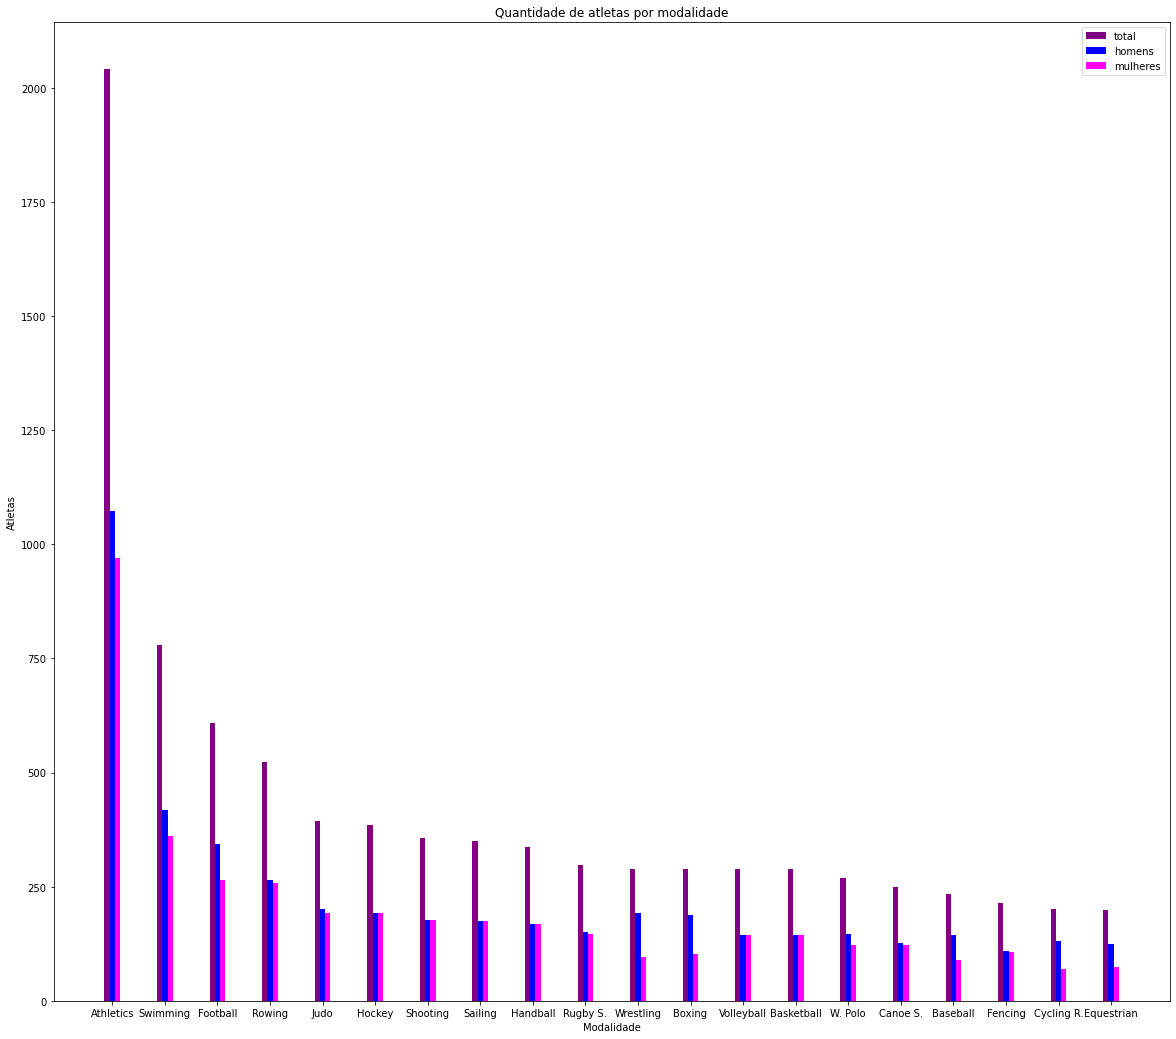

In [45]:
#copiando o dataframe para trabalhar nele
df_gender_sorted_discipline = df_gender_sorted

#trocando os nomes de colunas que são grande demais para o gráfico
df_gender_sorted_discipline = df_gender_sorted_discipline.replace('Rugby Sevens', 'Rugby S.')
df_gender_sorted_discipline = df_gender_sorted_discipline.replace('Water Polo', 'W. Polo')
df_gender_sorted_discipline = df_gender_sorted_discipline.replace('Baseball/Softball', 'Baseball')
df_gender_sorted_discipline = df_gender_sorted_discipline.replace('Cycling Road', 'Cycling R.')
df_gender_sorted_discipline = df_gender_sorted_discipline.replace('Canoe Sprint', 'Canoe S.')

#trocando o index do dataframe
df_gender_sorted_discipline = df_gender_sorted_discipline.set_index('Discipline')

#plotando gráfico para comparar a quantidade de homens e mulheres
plt.figure(figsize=(20, 18))

width = 0.1
r1 = np.arange(len(df_gender_sorted_discipline['Total']))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

plt.bar(r1, df_gender_sorted_discipline['Total'], color = 'purple', width = width, label = 'total')
plt.bar(r2, df_gender_sorted_discipline['Male'], color = 'blue', width = width, label = 'homens')
plt.bar(r3, df_gender_sorted_discipline['Female'], color = 'fuchsia', width = width, label = 'mulheres')

plt.xticks([r + width for r in range(len(df_gender_sorted_discipline['Total']))], df_gender_sorted_discipline.index)
plt.xlabel('Modalidade')
plt.ylabel('Atletas')
plt.title('Quantidade de atletas por modalidade')

plt.legend()

In [46]:
#total de atletas mulheres
total_mulheres = df_gender['Female'].sum()
total_mulheres

5432

In [47]:
#criando dataframe com os dados acima e colocando como índice o time
quantidade_atletas_genero = {'Tipo': ['Total', 'Homens', 'Mulheres'], 'Quantidade': [total_atletas, total_homens, total_mulheres]}  
quantidade_atletas_genero = pd.DataFrame(quantidade_atletas_genero)
quantidade_atletas_genero.set_index('Tipo', inplace = True)
quantidade_atletas_genero

,Quantidade
Tipo,
Total,11316
Homens,5884
Mulheres,5432


<AxesSubplot:title={'center':'Quantidade de atletas por gênero'}, xlabel='Tipo'>

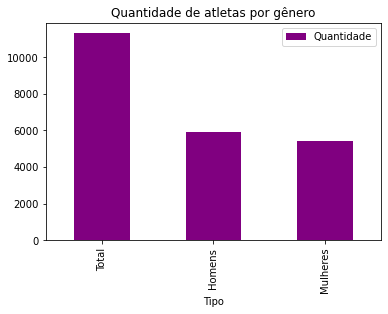

In [48]:
#plotando o gráfico de barras
quantidade_atletas_genero.plot.bar(title = 'Quantidade de atletas por gênero', color = 'purple')